In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_wine = pd.read_csv("dataset/wine.data", header=None)

In [3]:
df_wine.columns = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash',  'Magnesium','Total phenols',
                   'Flavanoids','Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [4]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df_wine['class'].values)
X = df_wine.iloc[:, 1:14].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
print('Training accuracy:', pipe_lr.score(X_train, y_train))

Training accuracy: 0.9507042253521126


In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train,cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [1.         0.93333333 0.92857143 1.         1.         0.85714286
 0.92857143 0.85714286 0.92857143 1.        ]
CV accuracy: 0.943 +/- 0.053


In [8]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
pipe_lr_ = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr_, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

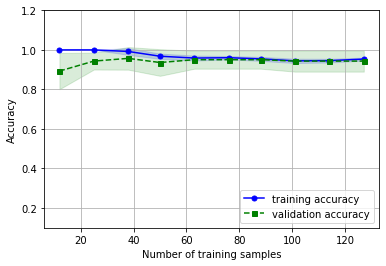

In [9]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', 
             markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1, 1.2])
plt.show()

In [10]:
pipe_lr_.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA(n_components=2)),
  ('logisticregression', LogisticRegression(random_state=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(n_components=2),
 'logisticregression': LogisticRegression(random_state=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__ra

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
pipe_lr1 = make_pipeline(StandardScaler(), PCA(), LogisticRegression(random_state=1))
param_range = [0.001, 0.01, 0.1,1.0, 10.0, 100.0]
param_list =  ['l2', 'l1']
param_list1 =['lbfgs', 'liblinear',]
param_grid = [{'logisticregression__C': param_range, 'logisticregression__solver':param_list1}]
gs = GridSearchCV(estimator=pipe_lr1, param_grid=param_grid, scoring='accuracy',cv=15, n_jobs=1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9851851851851853
{'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}


In [12]:
#clf = gs.best_estimator_
#clf.fit(X_train, y_train)
#print('Test accuracy: %.3f' % clf.score(X_test, y_test))

##Test accuracy: 1.000

In [13]:
from sklearn.metrics import confusion_matrix
pipe_lr1.fit(X_train, y_train)
y_pred = pipe_lr1.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]


In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='micro'))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='micro'))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

Precision: 0.972
Recall: 0.972
F1: 0.972
